In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv('data0804.csv',encoding ='gb18030')

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_6208/604204412.py:1: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data0804.csv',encoding ='gb18030')


In [3]:
data.shape

(735267, 18)

In [4]:
data.head()

,数据日期,批次号,工厂,需求频次分类,价格分类,需求数量分类,是否有替代关系,是否慢流件,大总成,零件号,时间类型,时间,需求,EOP,月,周几,\t是不是周末,是不是节假日(包不包含节假日)
0,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,day,2023-07-25,0.0,NaN,7,1,0,0
1,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,day,2023-07-24,0.0,NaN,7,0,0,0
2,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,day,2023-07-23,0.0,NaN,7,6,1,0
3,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,day,2023-07-22,0.0,NaN,7,5,1,0
4,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,day,2023-07-21,0.0,NaN,7,4,0,0


In [4]:
data_month = data[data['时间类型']=='month']
print(len(data_month.零件号.unique()))
print(data_month.groupby(['需求数量分类'])['需求'].describe())

221
          count         mean           std  min  25%   50%      75%       max
需求数量分类                                                                       
FAST     4368.0  8676.437271  24809.857818  0.0  2.0  18.0  3047.25  272339.0
MIDDLE   4368.0    11.967033     35.769954  0.0  0.0   0.0    10.00    1105.0
SLOW    11375.0    53.523604    206.066802  0.0  0.0   2.0    24.00    4934.0


In [5]:
# 将DataFrame按照sku_id进行分组，并按照date升序排序
data_month = data_month.sort_values(by=['零件号', '时间']).reset_index(drop=True)

# 定义一个函数来处理每个分组
def remove_zero_sales(group):
    if group['需求'].eq(0).all():
        return pd.DataFrame()  # 返回空DataFrame，表示整个分组都要去除
    else:
        first_nonzero_index = group['需求'].ne(0).idxmax()
        return group.loc[first_nonzero_index:]

# 对每个分组调用处理函数
data_month = data_month.groupby('零件号').apply(remove_zero_sales).reset_index(drop=True)

data_month

,数据日期,批次号,工厂,需求频次分类,价格分类,需求数量分类,是否有替代关系,是否慢流件,大总成,零件号,时间类型,时间,需求,EOP,月,周几,\t是不是周末,是不是节假日(包不包含节假日)
0,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-04-01,2.0,1212.0,\N,\N,\N,1
1,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-05-01,1.0,1212.0,\N,\N,\N,1
2,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-06-01,0.0,1212.0,\N,\N,\N,1
3,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-07-01,1.0,1212.0,\N,\N,\N,0
4,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-08-01,0.0,1212.0,\N,\N,\N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,month,2023-03-01,0.0,NaN,\N,\N,\N,0
14986,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,month,2023-04-01,0.0,NaN,\N,\N,\N,1
14987,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,month,2023-05-01,0.0,NaN,\N,\N,\N,1
14988,20230804,804001,1000,A,C,FAST,n,n,0,ZCX02108125,month,2023-06-01,0.0,NaN,\N,\N,\N,1


10A810971


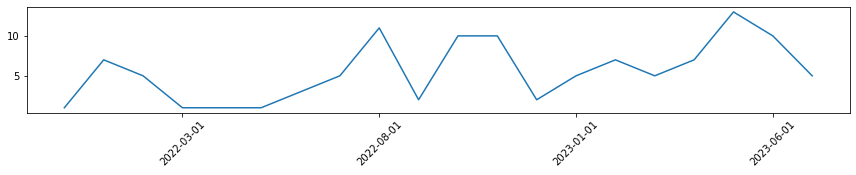

11D809909  GRU


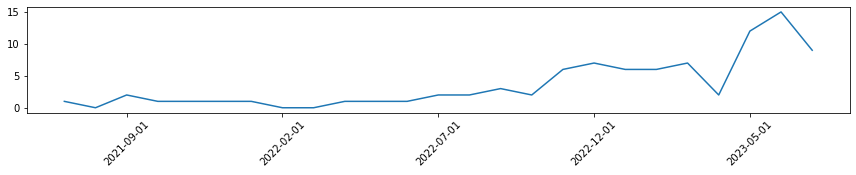

1ZD807368


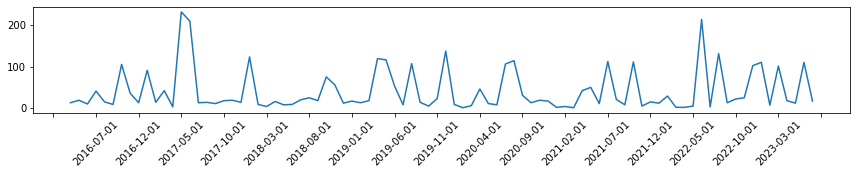

323853653


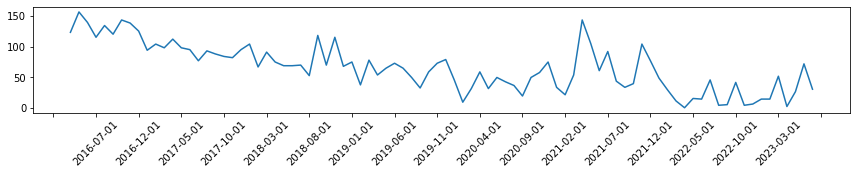

3CN837974  82V


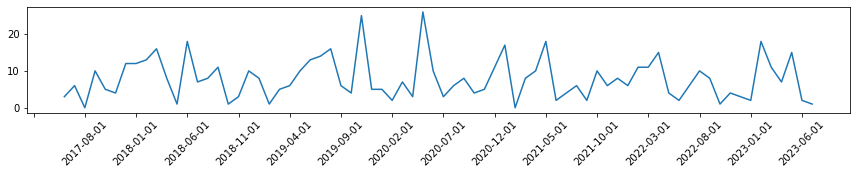

3G9035534


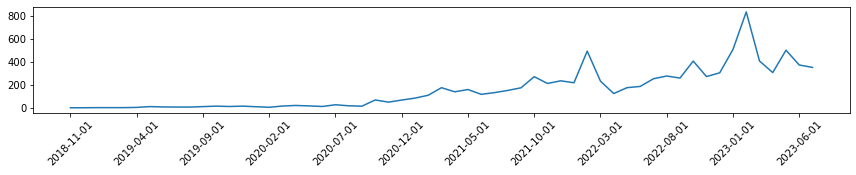

3T0819805A


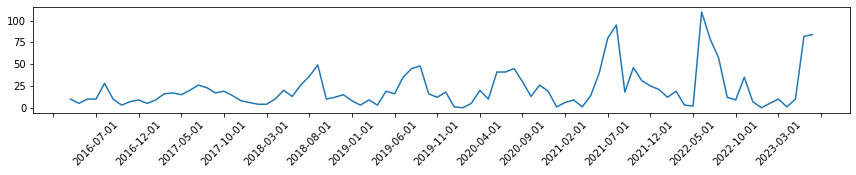

3TD837644


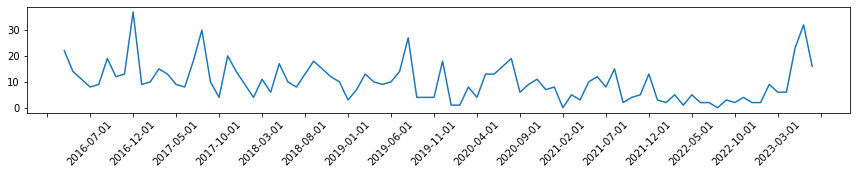

3TD837901A


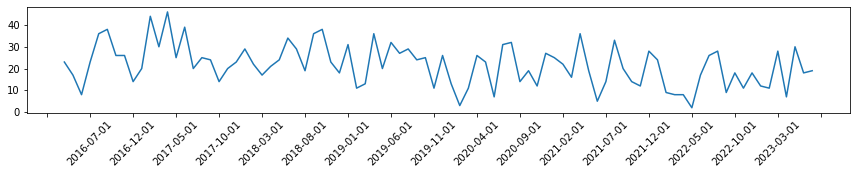

3VD807521B 9B9


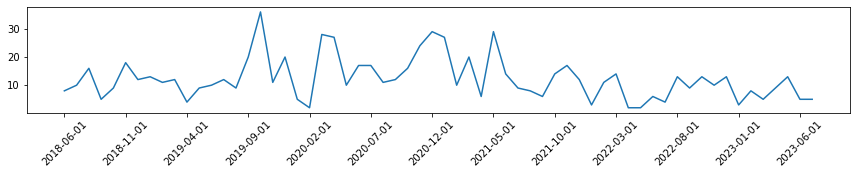

561858248  82V


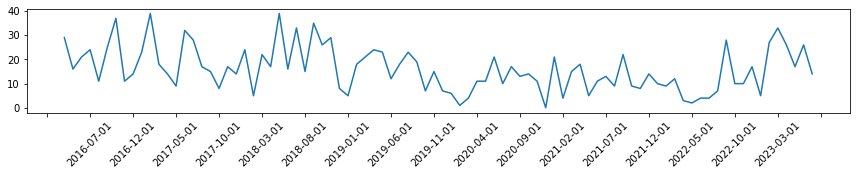

56G837249


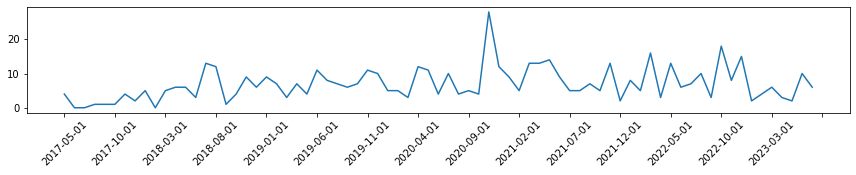

57D839472


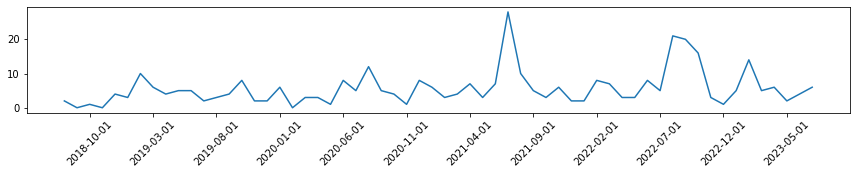

5DD807233


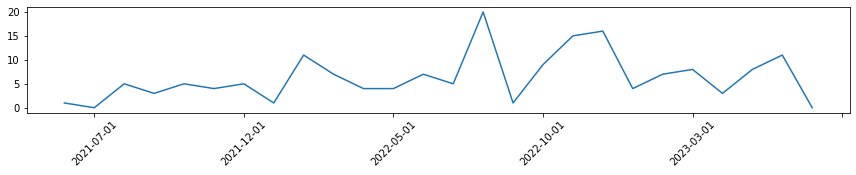

5ED807611C 9B9


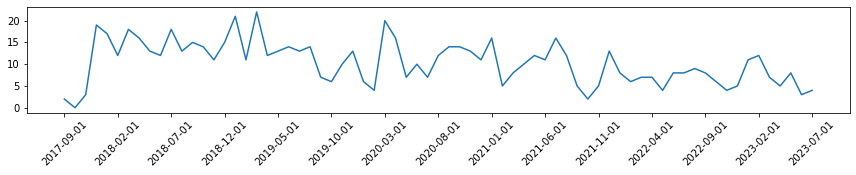

5ED813228


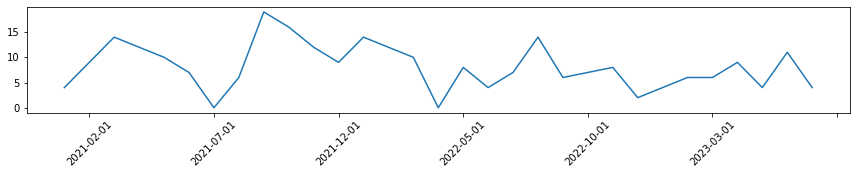

5ED885901A NFO


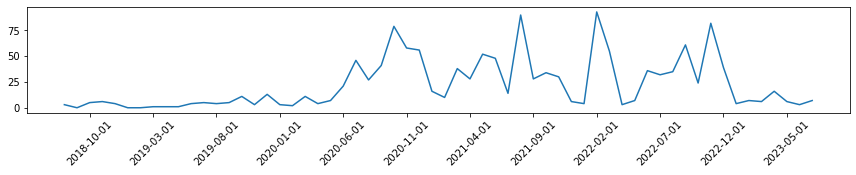

5GD805615


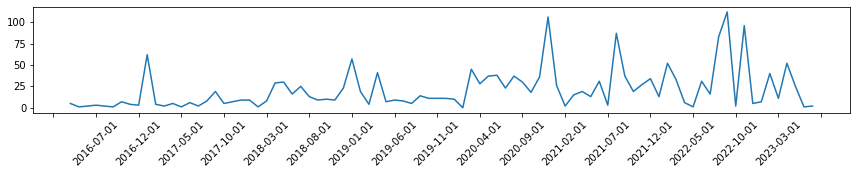

5LD853856A 9B9


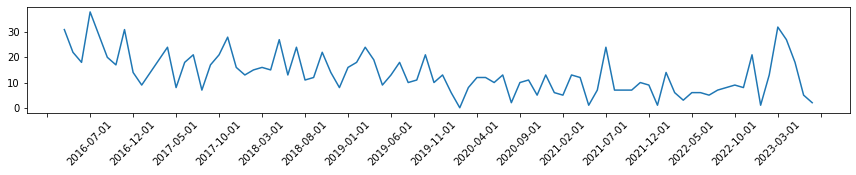

5N0867180C 81U


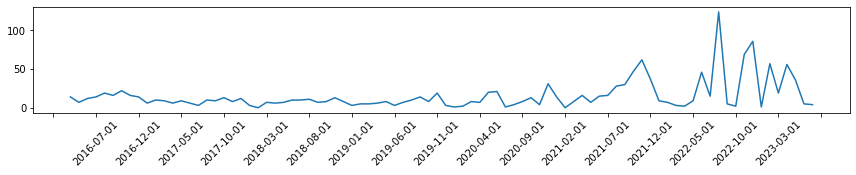

5NA867255  82V


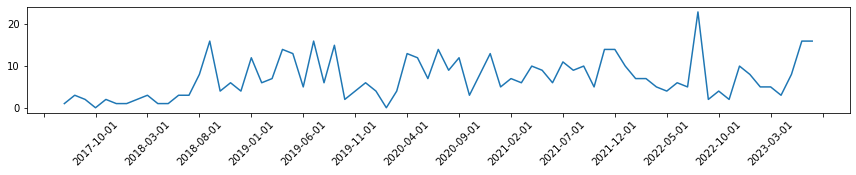

5Q1803155B


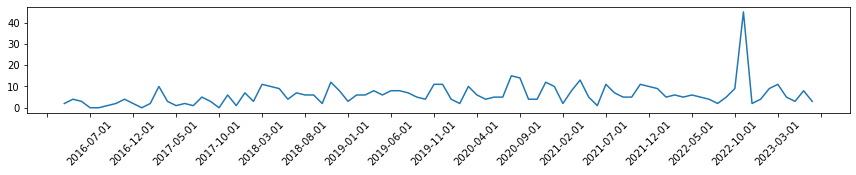

6QD807376


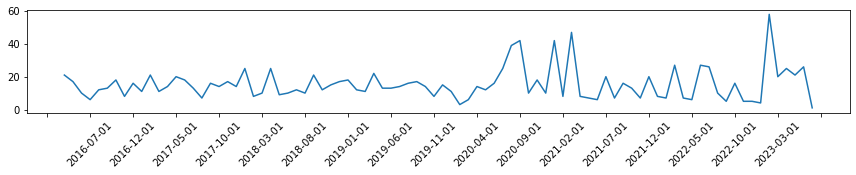

6RD819703H IZY


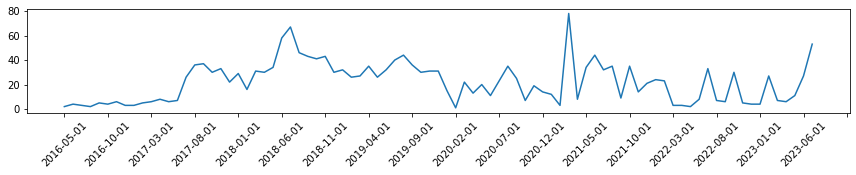

8D0805121B


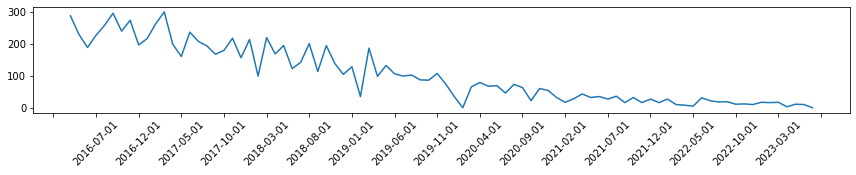

ALZ01800003


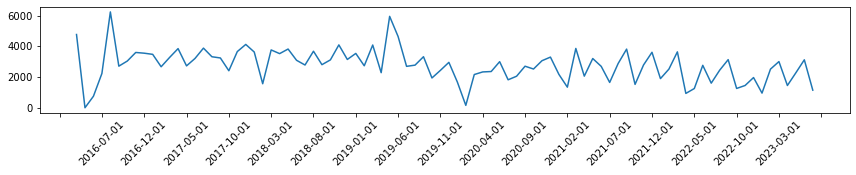

BCN000750Z3


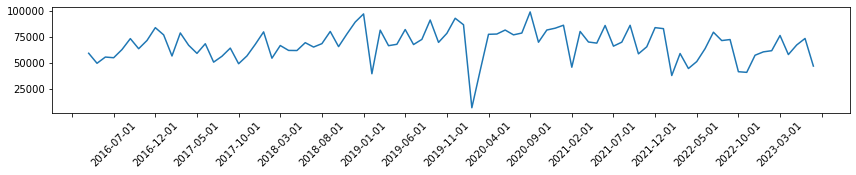

G  052182Z2


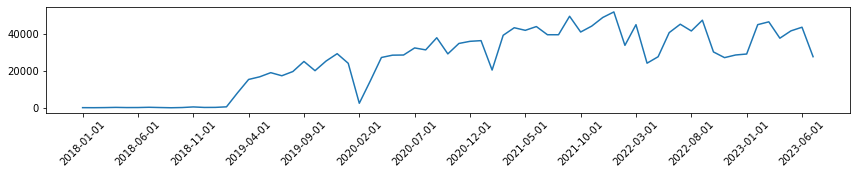

G  052540Z2


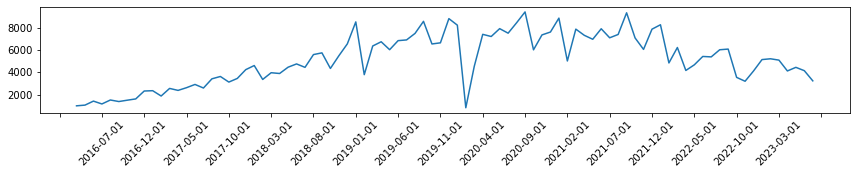

G  052579Z2


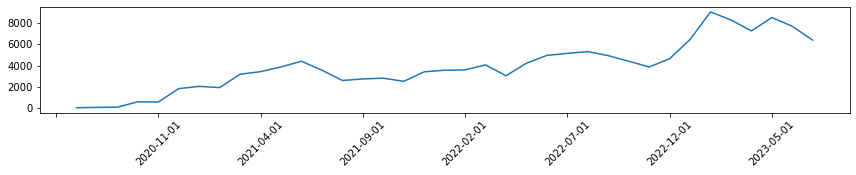

G  055512Z2


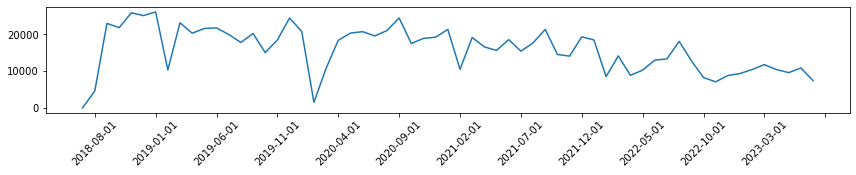

GCA052195Z2


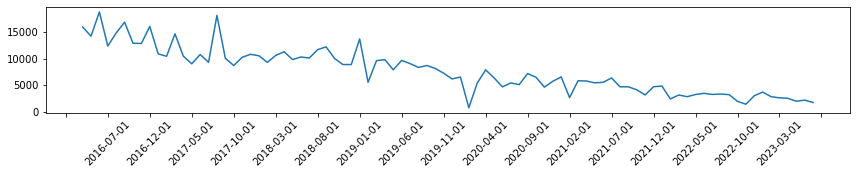

GCN000600D4


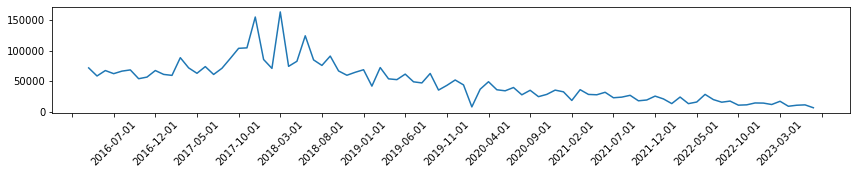

GCN052167Z2


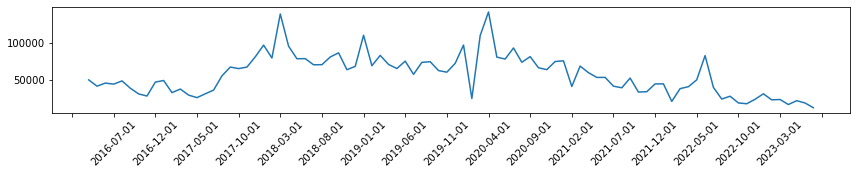

GCN052167Z4


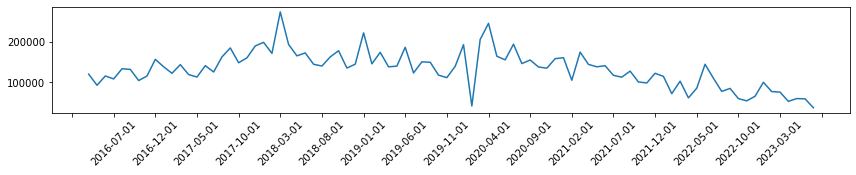

GCN055025Z2


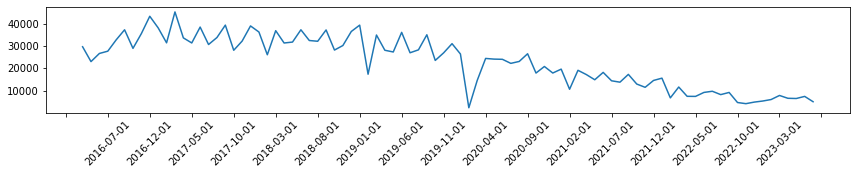

GCN060164Z1


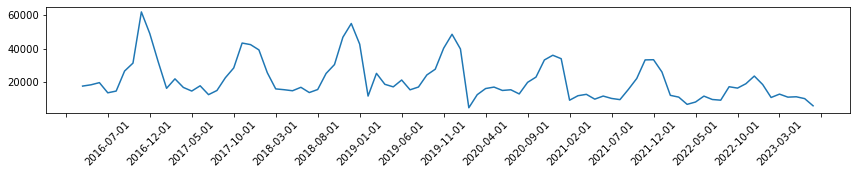

GVW052167A2


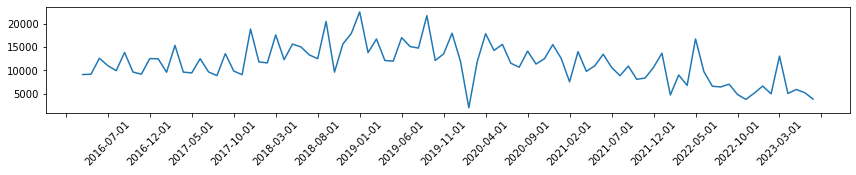

GVW052168Z2


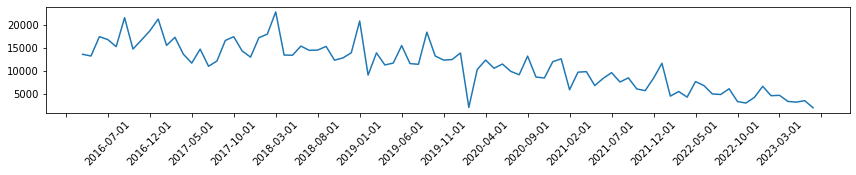

WHT003857


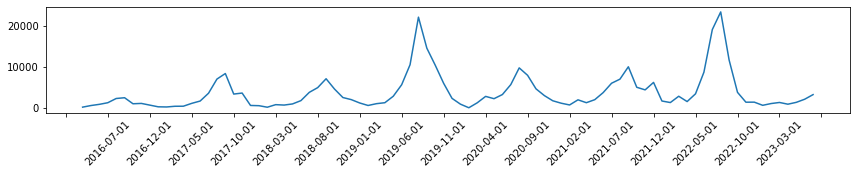

WHT003861


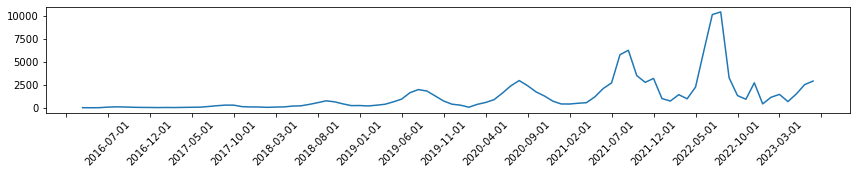

WHT003862


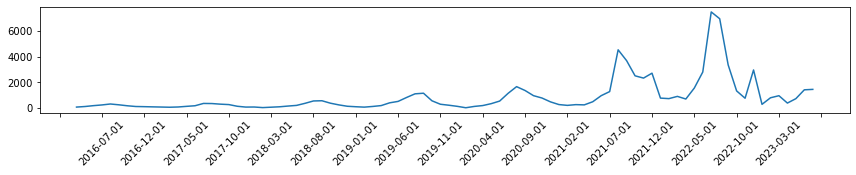

WHT003864


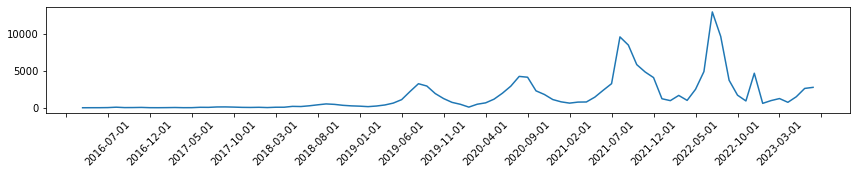

Z00042007


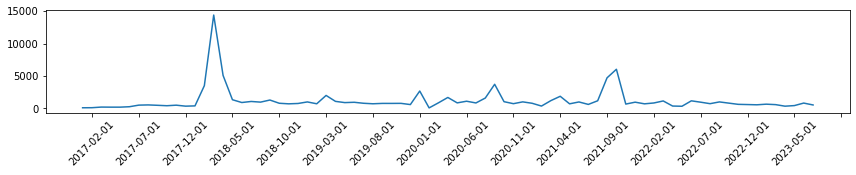

Z00042024


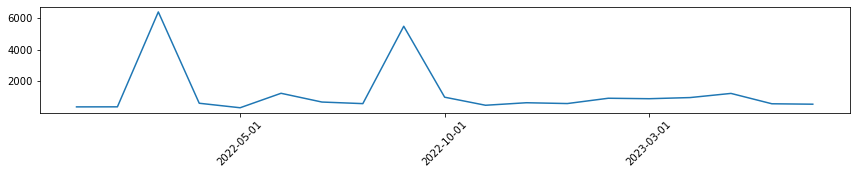

Z00071016  ROT


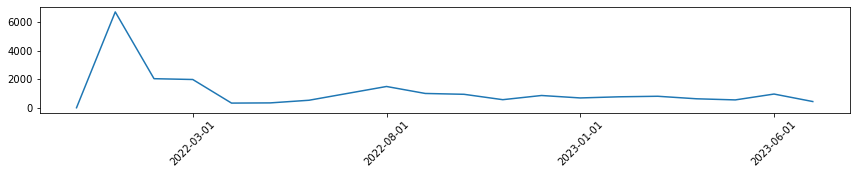

ZCX02004402


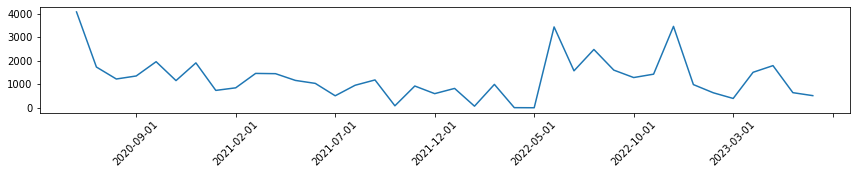

ZCX02108125


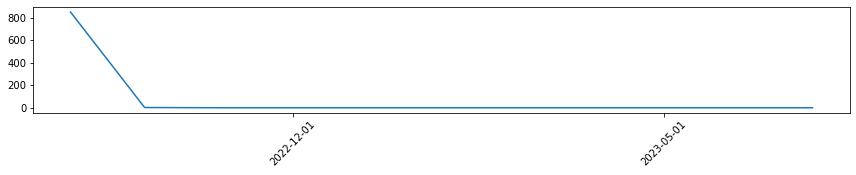

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for i in data_month.groupby(['需求数量分类','零件号']):
    if i[0][0]!='FAST':
        continue
    print(i[0][1])
    new_df = i[1][['时间','需求']].sort_values(by=['时间'])
    plt.figure(figsize=(12, 2))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # 每隔5天显示一个日期
    plt.plot(new_df['时间'], new_df['需求'])
    plt.tight_layout()  # 自动调整布局，以避免标签重叠
    plt.xticks(rotation=45)
    plt.show()

In [8]:
data_month.head()

,数据日期,批次号,工厂,需求频次分类,价格分类,需求数量分类,是否有替代关系,是否慢流件,大总成,零件号,时间类型,时间,需求,EOP,月,周几,\t是不是周末,是不是节假日(包不包含节假日)
0,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-04-01,2.0,1212.0,\N,\N,\N,1
1,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-05-01,1.0,1212.0,\N,\N,\N,1
2,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-06-01,0.0,1212.0,\N,\N,\N,1
3,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-07-01,1.0,1212.0,\N,\N,\N,0
4,20230804,804001,1000,F,C,SLOW,n,y,3,014311285E,month,2016-08-01,0.0,1212.0,\N,\N,\N,0


In [9]:
data_month['是否慢流件'].unique()

array(['y', 'n'], dtype=object)

In [10]:
print(data_month.groupby(['是否有替代关系'])['需求'].describe())

           count         mean           std  min  25%   50%   75%       max
是否有替代关系                                                                    
n        14119.0  2731.032651  14361.944207  0.0  2.0  11.0  69.0  272339.0
y          871.0     0.380023      1.775055  0.0  0.0   0.0   0.0      29.0


In [11]:
data_month[data_month['是否慢流件']=='n']['需求频次分类'].unique()

array(['F', 'A', 'E', 'B'], dtype=object)

In [12]:
data_month.groupby(['需求频次分类','价格分类','需求数量分类','是否有替代关系','大总成'])['零件号'].unique()

需求频次分类  价格分类  需求数量分类  是否有替代关系  大总成
A       C     FAST    n        0      [3G9035534, ALZ01800003, BCN000750Z3, G  05218...
              SLOW    n        1      [04E129712T, 06H115243K, 06J109257B, 06K103121...
B       B     MIDDLE  n        8      [11D857508J 9B9, 11D867212B OMV, 12D877069B, 1...
        D     SLOW    n        8      [18D823533  9B9, 18D853675AB2ZZ, 1T0867468  71...
C       C     FAST    n        8      [10A810971, 11D809909  GRU, 1ZD807368, 3238536...
E       A     SLOW    n        0      [760035454, EB100471, EC100105, ES000106, ES00...
        C     SLOW    n        1      [06L133781AD, 5QJ122051D, ES110256, ES110319, ...
F       B     SLOW    y        1      [028117021K, 03C133723AL, 04E103351G, 05810372...
        C     SLOW    n        3      [014311285E, 01V321432, 02M311183, 02T301115B,...
        D     MIDDLE  n        1      [036109623K, 036109641L, 03C121119H, 03C129717...
Name: 零件号, dtype: object

In [13]:
post_processed_data  = data_month[['零件号','时间',
                           '需求','需求频次分类','价格分类','需求数量分类','是否有替代关系','大总成']].sort_values(by =['零件号','时间'])
post_processed_data.head()

,零件号,时间,需求,需求频次分类,价格分类,需求数量分类,是否有替代关系,大总成
0,014311285E,2016-04-01,2.0,F,C,SLOW,n,3
1,014311285E,2016-05-01,1.0,F,C,SLOW,n,3
2,014311285E,2016-06-01,0.0,F,C,SLOW,n,3
3,014311285E,2016-07-01,1.0,F,C,SLOW,n,3
4,014311285E,2016-08-01,0.0,F,C,SLOW,n,3


In [14]:
post_processed_data.groupby(['零件号'])['需求'].count().reset_index()['需求'].describe()

count    221.000000
mean      67.828054
std       26.465541
min        5.000000
25%       49.000000
50%       86.000000
75%       88.000000
max       88.000000
Name: 需求, dtype: float64

In [15]:
post_processed_data.head()

,零件号,时间,需求,需求频次分类,价格分类,需求数量分类,是否有替代关系,大总成
0,014311285E,2016-04-01,2.0,F,C,SLOW,n,3
1,014311285E,2016-05-01,1.0,F,C,SLOW,n,3
2,014311285E,2016-06-01,0.0,F,C,SLOW,n,3
3,014311285E,2016-07-01,1.0,F,C,SLOW,n,3
4,014311285E,2016-08-01,0.0,F,C,SLOW,n,3


In [16]:
post_processed_data_test = post_processed_data[post_processed_data['零件号'].isin(['014311285E','036109641L'])]

In [17]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")


def get_date_feature(df):
    """取时间特征"""
    df["时间"] = pd.to_datetime(df["时间"], format="%Y-%m-%d %H:%M:%S")
    df["dayofmonth"] = df["时间"].dt.day.astype(int)
    df["dayofyear"] = df["时间"].dt.dayofyear.astype(int)
    df["dayofweek"] = df["时间"].dt.dayofweek.astype(int)
    df["month"] = df["时间"].dt.month.astype(int)
    df["week"] = df["时间"].dt.weekofyear.astype(int)
    df["quarter"] = (df["时间"].dt.quarter).astype(int)
    return df

def data_clean(df):
    """数据补全逻辑"""
    df['时间'] = pd.to_datetime(df['时间'])
    
    
    df.sort_values(['零件号', '时间'], inplace=True)
    df = df.reset_index(drop=True)

    # 生成前12个月每个月销量的列
    for i in range(1, 12):
        df[f'LastMonthSales_{i}'] = df.groupby('零件号')['需求'].shift(i)

    # 生成历史最大值的列
#     df['MaxSales'] = df.groupby('零件号')['需求'].shift(1).expanding().max()

#     生成近半年的最大值
    df['LastsixMonthsMax'] = df.groupby('零件号')['需求'].rolling(window=7, min_periods=1).apply(lambda x: x[:-1].max()).reset_index(drop=True)
    df['LastsixMonthsMin'] = df.groupby('零件号')['需求'].rolling(window=7, min_periods=1).apply(lambda x: x[:-1].min()).reset_index(drop=True)
    df['LastsixMonthsmean'] = df.groupby('零件号')['需求'].rolling(window=7, min_periods=1).apply(lambda x: x[:-1].mean()).reset_index(drop=True)

    df['LastsixMonths85Quantile'] = df.groupby('零件号')['需求'].rolling(window=7, min_periods=1).apply(lambda x: x[:-1].quantile(0.25)).reset_index(drop=True)
    df['LastsixMonths50Quantile'] = df.groupby('零件号')['需求'].rolling(window=7, min_periods=1).apply(lambda x: x[:-1].quantile(0.50)).reset_index(drop=True)
    df['LastsixMonths25Quantile'] = df.groupby('零件号')['需求'].rolling(window=7, min_periods=1).apply(lambda x: x[:-1].quantile(0.85)).reset_index(drop=True)

    df = get_date_feature(df)
    df = df[df['时间']>='2017-07-01']
    return df

In [18]:
test = data_clean(post_processed_data_test)

In [19]:
# # 逐列向前填充
# for i in range(18, 8, -1):  # 从最右侧的列开始向左遍历
#     test.iloc[:, i - 1] = test.iloc[:, i - 1].fillna(test.iloc[:, i])

In [20]:
# test.dropna(subset=test.columns[8:20], how='all', inplace=True)

In [21]:
# test.to_csv('test01.csv',encoding ='gb18030')

In [22]:
test.head()

,零件号,时间,需求,需求频次分类,价格分类,需求数量分类,是否有替代关系,大总成,LastMonthSales_1,LastMonthSales_2,...,LastsixMonthsmean,LastsixMonths85Quantile,LastsixMonths50Quantile,LastsixMonths25Quantile,dayofmonth,dayofyear,dayofweek,month,week,quarter
15,014311285E,2017-07-01,0.0,F,C,SLOW,n,3,1.0,1.0,...,0.666667,0.25,1.0,1.00,1,182,5,7,26,3
16,014311285E,2017-08-01,0.0,F,C,SLOW,n,3,0.0,1.0,...,0.666667,0.25,1.0,1.00,1,213,1,8,31,3
17,014311285E,2017-09-01,28.0,F,C,SLOW,n,3,0.0,0.0,...,0.500000,0.00,0.5,1.00,1,244,4,9,35,3
18,014311285E,2017-10-01,0.0,F,C,SLOW,n,3,28.0,0.0,...,5.166667,0.25,1.0,7.75,1,274,6,10,39,4
19,014311285E,2017-11-01,1.0,F,C,SLOW,n,3,0.0,28.0,...,5.000000,0.00,0.5,7.75,1,305,2,11,44,4


In [23]:
categorical_features = ['零件号','需求频次分类','价格分类','需求数量分类','是否有替代关系']
test[categorical_features] = test[categorical_features].astype('category')

In [25]:
from sklearn.model_selection import train_test_split

X = test.drop(['需求','时间'], axis=1)
y = test['需求']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from catboost import CatBoostRegressor

# 创建CatBoost回归模型
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, cat_features=categorical_features)

# 训练模型
model.fit(X_train, y_train, verbose=100)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

0:	learn: 5.3905349	total: 53.5ms	remaining: 5.29s
99:	learn: 1.0344710	total: 120ms	remaining: 0us
Mean Squared Error: 25.645047092486326
